# K-nearest neighbors algorithm

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In [ ]:
# k-Nearest Neighbor Regression
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

In [ ]:
# load the diabetes datasets
# for info on this dataset, refer to the linear_regression script
dataset = datasets.load_diabetes()

In [ ]:
#Let us now build a pandas dataframe hosting the data at hand

# We first need the list of feature names for our columns
# BMI is the Body Mass Index
# ABP is the Average Blood Pressure
lfeat = ["Age", "Sex", "BMI", "ABP", "S1", "S2", "S3", "S4", "S5", "S6"]

In [ ]:
# We now build the Dataframe, with the data as argument
# and the list of column names as keyword argument
df_diabetes = pd.DataFrame(dataset.data, columns = lfeat)
# Let's have a look at the first few entries
print "Printing data up to the 5th sample"
print df_diabetes.iloc[:5,:] # Look at the first 5 samples for all features.

In [ ]:
# We also want to add the regression target
# Let's create a new column :
df_diabetes["Target"] = dataset.target # Must have the correct size of course

In [ ]:
#Let's review our complete dataframe:
print
print "Printing data up to the 5th sample"
print "Also print the target"
print df_diabetes.iloc[:5,:] # Look at the first 5 samples for all features incuding target

In [ ]:
# Nearest neighbors are a simple, yet powerful regression method
# First, we define a metric to quantify how close two samples are together
# This can be the euclidean distance
# Then, we look for the k-closest points in the sense of the metric
# And we average the response of these points
# Mathematically, this gives :
# y(sample) = 1/k * (y_neighbor1 + y_neighbor2 + .. + y_neighbork)

# Nearest neighbors has the advantage of naturally adapting to non linearities of the data
# We only need to specify the number of neighbors we are looking for : k

# However, nearest neighbors
# suffer from the curse of dimensionality : with high dimensional data, it is difficult
# to have enough data to provide a smooth approximation to the target.
# Nearest neighbors are also expensive to evaluate since we need to find the k nearest neighbors
# for each point.

#As before, we create an instance of the model
model = KNeighborsRegressor()

In [ ]:
# Which we then fit to the training data X, Y
# with pandas we have to split the df in two :
# the feature part (X) and the target part (Y)
# This is done below :

data = df_diabetes[lfeat].values
target = df_diabetes["Target"].values
model.fit(data, target)
print(model)

In [ ]:
# as before, we can use the model to make predictions on any data

# summarize the fit of the model
# we can estimate the performance of the fit using the mse metric
# in this case, we simply compute the mean of the squared error on the sample
# the lower, the better
mse = np.mean((predicted-expected)**2)
print("Residual sum of squares: %.2f" % mse)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(data, target))

# Business formulation - continued

This is all good but it does not take into account non linearities of the data.
What if the illness depends on $age^2$?

Linear regression will then provide a poor model!

This is where nearest neighbors come into play.
It has the advantage of being non-parametric it is therefore a more flexible model.

See picture
The data is clearly non linear and the key idea of kNN is to predict the response for a point by an average of its closest neighbors.

Here, we show some points (salmon color) and their neighbors (aubergine)
We see that by averagin the illness value of the neighbors, we get something pretty close to the true value and this naturally takes care of non-linearities

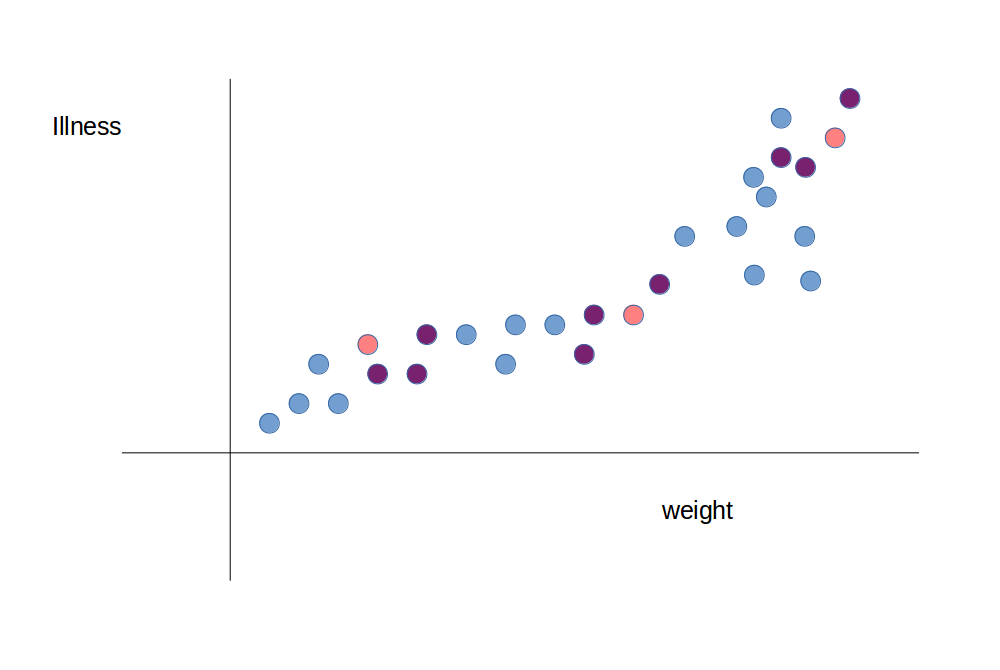

In [2]:
from IPython.display import Image
Image('figures/knn_reg.png')